<a href="https://colab.research.google.com/github/Rakesh-Patra/My-ML-Toolkit/blob/main/Anaconda%20Project/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:

X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=4, random_state=42)

In [6]:


df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])


In [7]:


df

Feature_1  Feature_2
0    -2.282534  -9.692815
1    -6.147668   1.755990
2    13.399091  -1.260023
3    -4.077630   3.160226
4     9.444735   0.340868
..         ...        ...
495  -1.282205  -3.181575
496  -2.817604  10.378894
497   3.296740   8.649256
498  -8.970519  -2.684073
499   6.717265   8.104125

[500 rows x 2 columns]

In [8]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [9]:


inertia = []
K_range = range(1, 11)

In [10]:


for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


In [11]:


inertia

[999.9999999999994,
 528.8064432605643,
 294.4377068678185,
 250.4552469653445,
 216.88110656982604,
 185.27440675195913,
 156.70879996290438,
 135.62603453115264,
 129.1039634823981,
 119.94101297104991]

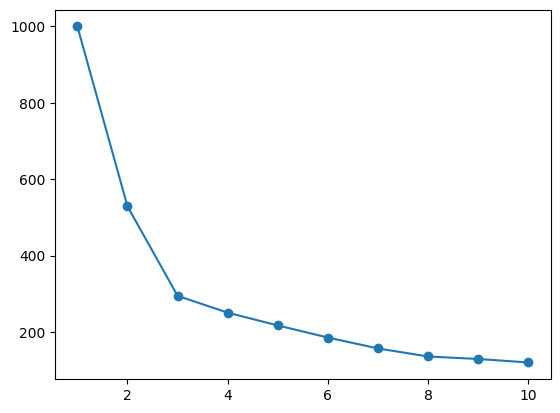

In [12]:


plt.plot(K_range, inertia, marker='o')

In [13]:

kmeans_final = KMeans(n_clusters=3, random_state=42)

In [14]:


cluster_labels = kmeans_final.fit_predict(X_scaled)

In [15]:


df['cluster'] = cluster_labels

In [16]:


sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

In [17]:


from sklearn.datasets import make_moons

In [18]:

X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [19]:

from sklearn.cluster import KMeans, DBSCAN

In [20]:

df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [21]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [22]:


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [23]:


df['kmeans_cluster'] = kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

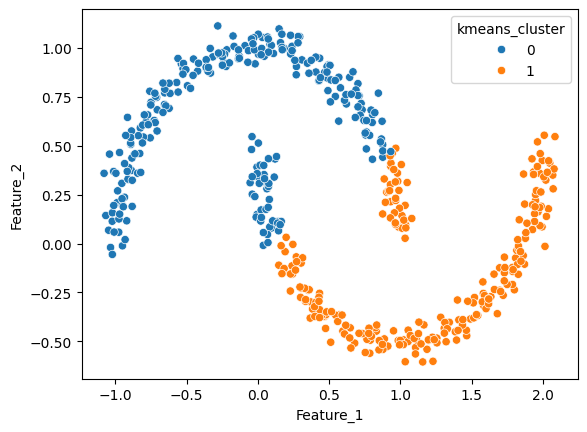

In [24]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['kmeans_cluster'], palette='tab10')


In [25]:


dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [26]:


df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

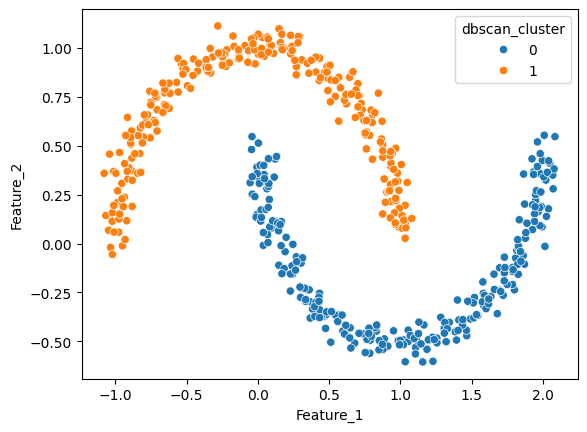

In [27]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['dbscan_cluster'], palette='tab10')

